# \\[Linear Algebra\\]

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import (norm,inv,det)
import warnings
import matplotlib.pyplot as plt

### 1.	Explain the dot product and cross product in your own words in markdown. Use LaTeX to properly show the equations.

##### Dot Product

Dot Product of two vectors measure the reationship between two vectors. It helps us understand the direction of the two vectors. 
Dot product is used to further calculate the angle between two vectors.

The output of dot product of two 1D array (vectors) is a scalar value. Dot product is calculated as the sum of the product of the respective elements in each vector. 

The dot product for two vectors a and b can be calculated as:

\\[ a \cdot b= \sum \limits_ {i=1}^n a_i b_i \\]


##### Cross Product
Cross Product of two vector results in a vector that is prependicular to the plan tje two vector lies is. It can be used to check if two vectors are coplanar. It is also helpful to define the distance between two vectors. 

Cross Product can be calculated as the product of the magnitude of the two vectors and the sine of the angle between them.
Cross Product for two vector A and B can be calculatyed as
\\[  A \times B=\left\| A \right\| \left\| B \right\| \sin \theta n  \\]

||A|| = length of vector A 

||B|| = length of vector B

θ = angle between A and B

n	=	unit vector perpendicular to the plane containing a and b 


### 2.	Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated. 

Dot Product of two vectors is the product of their magnitude and the cosine of the angle between them. 

Hence the angle between two vectors can be calculated as:
\\[ θ = arccos( \frac{v1.v2}{\left\| v1 \right\| \left\| v2 \right\|} ) \\]

In [2]:
def angle_between(v1,v2):
    """Calculate the angle θ in radians between two vetors"""
    v1=np.ravel(v1)
    v2=np.ravel(v2)
    try:
        if v1.shape == v2.shape:
            theta = np.arccos(np.dot(v1, v2.T)/(norm(v1)*norm(v2)))
        else:
            theta = np.arccos(np.dot(v1, v2)/(norm(v1)*norm(v2)))
        return theta
    except RuntimeWarning as w:
        print(w)
    except exception as e :
        print(e)

In [3]:
v = np.array([[-1, 0, 0]])
w = np.array([[0, 1, 0]])
angle_between(v,w)
print("Angle in radians : ", angle_between(v,w))
print("Angle in degrees : ", angle_between(v,w)*180/np.pi)

Angle in radians :  1.5707963267948966
Angle in degrees :  90.0


### 3.	Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

For a matrix of n dimensions each row can be selected to calculate dot product with another row.
However, while accessing the rows ina matrix the index starts with 0. Hence for n dimensional matrix the row index ranges from 0 to n-1. 

In [4]:
def row_dot(A, r1, r2):
    """Returns the dot product of row# r1 and row# r2 of matrix A"""
    if r1 <=0 or r2 <= 0:
        return "ERROR: Row number should be greater than 0"
    else:
        return np.dot(A[r1-1],A[r2-1])

In [5]:
M = np.array([[0,2,1,3], 
             [3,2,8,1], 
             [1,0,0,3],
             [0,3,2,1]])
print("Dot product of first two rows: ",row_dot(M,1,2))
print("Dot product of last two rows: ",row_dot(M,3,1))

Dot product of first two rows:  15
Dot product of last two rows:  9


### 4.	Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

There is no concept of matrix division as such. However if we do still need to do such a computation we can do a matrix multiplication of the first matrix with the inverse of the second matrix. 

Matrix division of two matrices m1 and m2 can be mathematically seen as -
\\[m1 . \frac{1}{m2} \\]

In [6]:
def matrix_division(m1, m2):
    """Returning dot product of first matrix with the inverse of the second matrix"""
    m2_inv = np.array([])
    m2_inv = inv(m2)
    result = np.dot(m1,m2_inv)
    return result

In [7]:
P = np.array([[7,6,1,3], 
             [3,2,4,5], 
             [1,2,9,3],
             [7,3,5,1]])
Q = np.array([[5,2,5,3], 
             [4,2,6,1], 
             [5,5,4,3],
             [0,6,8,1]])
matrix_division(P,Q)

array([[-1.1322314 ,  0.43801653,  2.18181818, -0.58677686],
       [ 2.66942149, -1.90495868, -0.54545455,  0.53305785],
       [ 2.4214876 , -0.95867769, -1.45454545,  1.05785124],
       [-1.09090909,  1.86363636,  1.        , -0.59090909]])

### 5.	Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise. 

If two vectors are prependicular to each other when the angle between them is π\2 in radians or 90 degrees. We need to check for this value while considering the tolerance margins.

In [8]:
def is_orthogonal(v1,v2,tol):
    """Checks if two vectors for prependicular to each other accounting for tolerance value. Returns 1 if orthogonal else 0."""
    if tol <= 0:
        return "tol should be a scalar value strictly greater than 0"
    else:
        theta = angle_between(v1,v2)
        if (abs(np.pi/2-theta)<=tol).any():
            return 1
        else:
            return 0

In [9]:
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
print("Sample output 1 :",is_orthogonal(a,b,0.01))

# output: 0
print("Sample output 2 :",is_orthogonal(a,b, 0.001))

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
print("Sample output 3 :",is_orthogonal(a,b, 0.01))

a = np.array([[1], [1]])
b = np.array([[-1], [1]])
print("Sample output 4 :",is_orthogonal(a,b, 1e-10))

Sample output 1 : 1
Sample output 2 : 0
Sample output 3 : 0
Sample output 4 : 1


### 6.	Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4. 

Creating a class vector_calculator() with v1 and v2 vectors as instance variables. angle_between and is_orthogonal are instance methods. 

In [10]:
class vector_calculator():
    '''Class takes in two vectors. Has 2 methode to calculate angle and to check if the vectors are orthogonal'''
    def __init__(self, vector1, vector2):
        self.v1=np.ravel(vector1)
        self.v2=np.ravel(vector2) 
        
    def angle_between(self):
        """Calculate the angle θ in radians between two vetors"""
        v1 = self.v1
        v2= self.v2
        try:
            if v1.shape == v2.shape:
                theta = np.arccos(np.dot(v1, v2.T)/(norm(v1)*norm(v2)))
            else:
                theta = np.arccos(np.dot(v1, v2)/(norm(v1)*norm(v2)))
            return theta
        except RuntimeWarning as w:
            print(w)
        except exception as e :
            print(e)
        
    def is_orthogonal(self,tol=0):
        """Checks if two vectors for prependicular to each other accounting for tolerance value."""
        if tol < 0:
            return "tol should be a scalar value strictly greater than 0"
        else:
            v1=self.v1
            v2=self.v2
            theta = self.angle_between() 
            if (abs(np.pi/2-theta)<=tol).any():
                return 1
            else:
                return 0

In [11]:
v_1 = np.array([[7], 
             [3], 
             [1],
             [7]])
v_2 = np.array([[1], 
             [0], 
             [20],
             [0]])
v = vector_calculator(v_1,v_2)
print("Angle between the vectors in radians:",v.angle_between())

print("Are the two vectors orthogonal with tolerance=0? Yes(1)or No(0) :", v.is_orthogonal())

print("Are the two vectors orthogonal with tolerance=0.2? Yes(1)or No(0) :", v.is_orthogonal(tol=0.2))

Angle between the vectors in radians: 1.4406878184123544
Are the two vectors orthogonal with tolerance=0? Yes(1)or No(0) : 0
Are the two vectors orthogonal with tolerance=0.2? Yes(1)or No(0) : 1


### 7.	Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

Principal Component Analysis is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information of original dataset. 

Below is the exploratory analysis of Breast Cancer dataset from sklearn library

In [12]:
# Loading Breast Cancer dataset from sklearn dataset library
from sklearn.datasets import load_breast_cancer

In [13]:
# This loads both data (.data) and labels (.target)
# 'target_names': array(['malignant', 'benign'], dtype='<U9')
breast = load_breast_cancer()
# breast #ran to check contents

In [14]:
# Loading data
# 569 samples with 30 features
breast_data = breast.data
breast_data.shape

(569, 30)

In [15]:
# Loading labels
breast_labels = breast.target
display(breast_labels.shape)

labels = np.reshape(breast_labels,(569,1))

(569,)

In [16]:
# Concatenating data and labels into single array
final_breast_data = np.concatenate([breast_data,labels],axis=1)
display(final_breast_data.shape)
# Converting into data frame
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.head()

(569, 31)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [17]:
# Updating column names
features = breast.feature_names
display(features)

# As features does not include label, adding it to update the column names accordingly.

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [18]:
# Substituting label column value for clarity

breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [20]:
# normalizing and scaling the selected data

from sklearn.preprocessing import StandardScaler
breast_dataset_scaled = breast_dataset.loc[:, features].values
breast_dataset_scaled = StandardScaler().fit_transform(breast_dataset_scaled) # normalizing the features

In [21]:
breast_dataset_scaled.shape

(569, 30)

In [22]:
# normalized data shpu;d have mean of 0 and standard deviation of 1

np.mean(breast_dataset_scaled),np.std(breast_dataset_scaled)

(-6.826538293184326e-17, 1.0)

In [23]:
# Converting normalized data into tabular format
feat_cols = ['feature' + str(i) for i in range(breast_dataset_scaled.shape[1])]
normalised_breast = pd.DataFrame(breast_dataset_scaled,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [24]:
# using the PCA module now, here we convert this 30 featured data down to 4 Principal Components.
# Selected 4 components here as it approximately covers 79% of the data. Check explained_variance_ratio_

from sklearn.decomposition import PCA
pca_breast = PCA(n_components=4)
principalComponents_breast = pca_breast.fit_transform(breast_dataset_scaled)

In [25]:
principal_breast_df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [26]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163 0.06602135]


In [27]:
principal_breast_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,9.192837,1.948583,-1.123167,3.633734
1,2.387802,-3.768172,-0.529293,1.118267
2,5.733896,-1.075174,-0.551747,0.912078
3,7.122953,10.275589,-3.232790,0.152549
4,3.935302,-1.948072,1.389767,2.940638


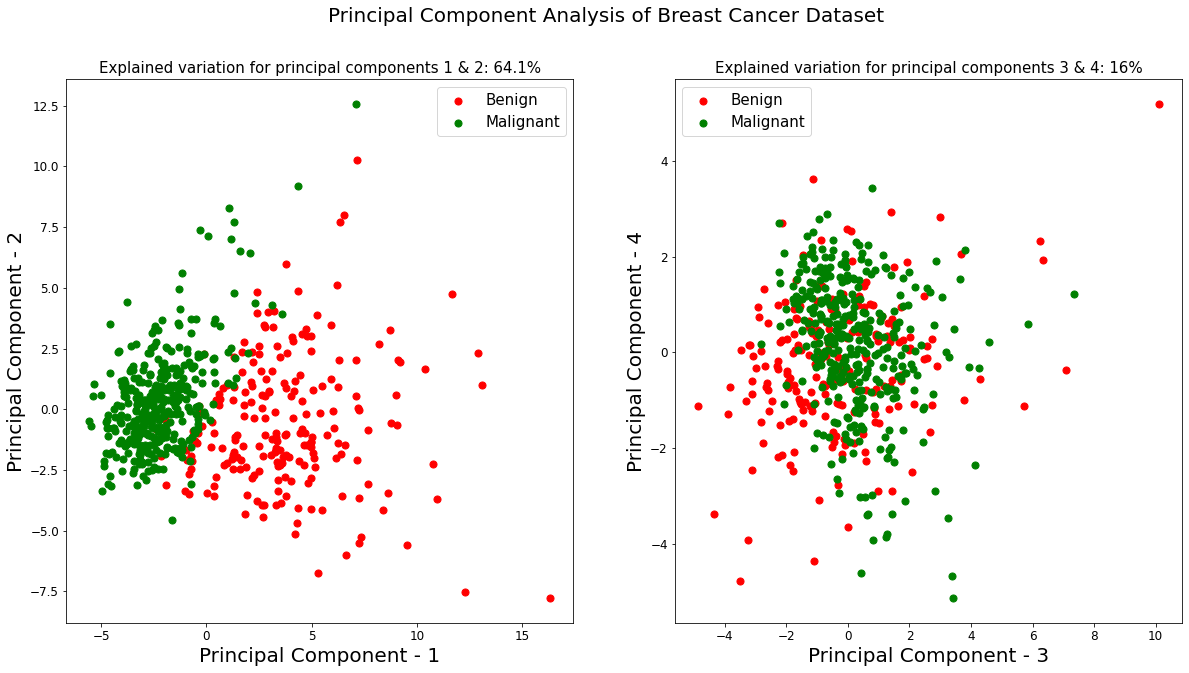

In [28]:
# Plotting the Principal Componenets across 2 subplots to see how samples are distributed across both the labels.

fig, ax = plt.subplots(1,2,figsize=(20,10))

targets = ['Benign', 'Malignant']
colors = ['r', 'g']
fig.suptitle("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

# Principal Component 1 & Principal Component 2
ax[0].tick_params(labelsize=12)
ax[0].set_xlabel('Principal Component - 1',fontsize=20)
ax[0].set_ylabel('Principal Component - 2',fontsize=20)
ax[0].set_title("Explained variation for principal components 1 & 2: 64.1%",fontsize=15)

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    ax[0].scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

ax[0].legend(targets,prop={'size': 15})

# Principal Component 3 & Principal Component 4
ax[1].tick_params(labelsize=12)
ax[1].set_xlabel('Principal Component - 3',fontsize=20)
ax[1].set_ylabel('Principal Component - 4',fontsize=20)
ax[1].set_title("Explained variation for principal components 3 & 4: 16%",fontsize=15)


for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    ax[1].scatter(principal_breast_df.loc[indicesToKeep, 'principal component 3']
               , principal_breast_df.loc[indicesToKeep, 'principal component 4'], c = color, s = 50)

ax[1].legend(targets,prop={'size': 15});

##### Observation:
Benign cases are more spread out than Malignant ones.